In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("project_groupB_data.csv")
df.head()

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
0,bb0aa56d-fd4e-461a-871f-6f4fd9c4d1b9,Conny,Jerzykiewicz,cjerzykiewicz0@sourceforge.net,F,178.160.146.88,Mongolia,Other,816452,False,20-Mar,heavy user,48,pve,8297.29,7.0
1,59740d2b-5fca-4107-a4a8-c77c2aaa7b7e,Engracia,Radbourn,eradbourn1@weather.com,F,105.205.185.220,Indonesia,AOS,384905,True,21-Dec,heavy user,87,pvp,3492.51,2.0
2,0e07978a-443f-418a-88a8-08d111d2b8b9,Cassie,Jockle,cjockle2@mediafire.com,M,107.44.140.249,Ireland,Other,12513,False,20-Nov,heavy user,78,fishing,2902.57,7.0
3,57a9003b-f041-4643-80e6-bafcc2ad35dc,Papagena,Oles,poles3@guardian.co.uk,F,14.75.218.226,China,AOS,678059,False,21-Jan,heavy user,46,pvp,9616.49,18.0
4,806ecf02-f399-41ac-ba5d-f97c6caefc07,Boyce,Fleischmann,bfleischmann4@joomla.org,F,14.182.239.98,Indonesia,Other,98767,True,22-Jan,heavy user,5,fishing,3656.33,18.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   object 
 1   first_name         1000 non-null   object 
 2   last_name          1000 non-null   object 
 3   email              1000 non-null   object 
 4   gender             1000 non-null   object 
 5   ip_address         1000 non-null   object 
 6   country            1000 non-null   object 
 7   pay_store          1000 non-null   object 
 8   pay_amount         1000 non-null   int64  
 9   information_agree  1000 non-null   bool   
 10  first_login_date   1000 non-null   object 
 11  pay_user_type      1000 non-null   object 
 12  level              1000 non-null   int64  
 13  action_user_type   1000 non-null   object 
 14  playtime           1000 non-null   float64
 15  battle_pass_level  849 non-null    float64
dtypes: bool(1), float64(2), i

In [4]:
df.describe(include='all')

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
count,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000,1000.000000,849.000000
unique,1000,933,991,1000,2,1000,121,3,NaN,2,50,3,NaN,4,NaN,NaN
top,bb0aa56d-fd4e-461a-871f-6f4fd9c4d1b9,Webb,Gidley,cjerzykiewicz0@sourceforge.net,F,178.160.146.88,China,Other,NaN,False,20-Jul,heavy user,NaN,pvp,NaN,NaN
freq,1,3,2,1,512,1,191,699,NaN,510,30,722,NaN,276,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506928.942000,NaN,NaN,NaN,50.067000,NaN,5297.402230,10.577150
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283274.383373,NaN,NaN,NaN,28.874977,NaN,2826.981267,5.819129
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2506.000000,NaN,NaN,NaN,1.000000,NaN,11.040000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264367.500000,NaN,NaN,NaN,25.750000,NaN,2981.510000,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516729.000000,NaN,NaN,NaN,49.000000,NaN,5377.085000,11.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732825.000000,NaN,NaN,NaN,75.000000,NaN,7683.482500,15.000000


- 이미 user등급이 분류되어 있지만 우리만의 segmentation을 시도해 보는 것도 좋을 것 같다.
  

In [6]:
df['ip_address'].nunique()

1000

In [7]:
df['action_user_type'].unique()

array(['pve', 'pvp', 'fishing', 'raid'], dtype=object)

In [8]:
df['first_login_date'].unique()

array(['20-Mar', '21-Dec', '20-Nov', '21-Jan', '22-Jan', '21-Jul',
       '23-Oct', '22-Dec', '22-Sep', '22-Nov', '21-Mar', '20-Dec',
       '21-Feb', '23-Sep', '20-Sep', '22-May', '20-Jan', '22-Mar',
       '23-Apr', '22-Jun', '23-Feb', '23-Jan', '21-Jun', '20-Jul',
       '23-Mar', '21-Nov', '22-Apr', '23-Jul', '20-May', '20-Aug',
       '22-Feb', '20-Apr', '20-Oct', '21-Oct', '23-Dec', '20-Feb',
       '21-Aug', '20-Jun', '22-Oct', '24-Feb', '21-Sep', '23-May',
       '21-May', '24-Jan', '21-Apr', '22-Aug', '22-Jul', '23-Aug',
       '23-Nov', '23-Jun'], dtype=object)

- 'action_user_type'에서 fishing, raid의 이미 물어보기
- 20년 4월 ~ 24년 1월까지의 자료이다

In [10]:
df['first_login_date'].unique().max()

'24-Jan'

In [11]:
df['first_login_date'].unique().min()

'20-Apr'

In [16]:
df['battle_pass_level'].unique()

array([ 7.,  2., 18.,  3.,  0.,  6., 15., 20.,  9., nan, 14., 19.,  4.,
       17.,  8.,  5., 13., 10.,  1., 12., 16., 11.])

In [18]:
list = [7.,  2., 18.,  3.,  0.,  6., 15., 20.,  9., 'nan', 14., 19.,  4.,
       17.,  8.,  5., 13., 10.,  1., 12., 16., 11.]

In [21]:
list2 = [7.,  2., 18.,  3.,  0.,  6., 15., 20.,  9., 14., 19.,  4.,
       17.,  8.,  5., 13., 10.,  1., 12., 16., 11.]

In [23]:
min(list2)

0.0

In [24]:
max(list2)

20.0

- battle_pass_level 최소값은 0, 최대값은 20

### EDA

In [25]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'country', 'pay_store', 'pay_amount', 'information_agree',
       'first_login_date', 'pay_user_type', 'level', 'action_user_type',
       'playtime', 'battle_pass_level'],
      dtype='object')

In [46]:
# 1. user 성비

gender_counts = df['gender'].value_counts()
pd.DataFrame(gender_counts)

,gender
F,512
M,488


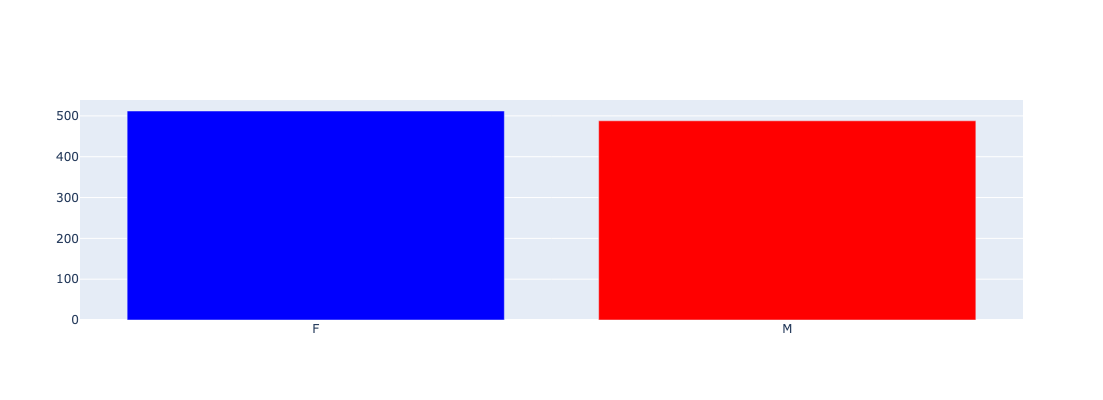

In [35]:
fig = go.Figure(data=[go.Bar(x=gender_counts.index, y=gender_counts.values, marker=dict(color=['blue', 'red']))])
fig.update_layout(width=500, height=400)
fig.show()

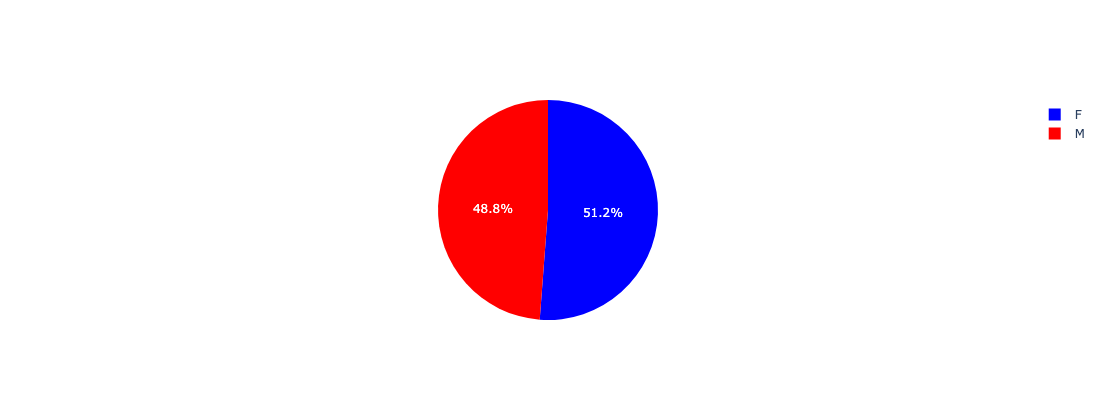

In [37]:
fig = go.Figure(data=[go.Pie(labels=gender_counts.index, values=gender_counts.values, marker=dict(colors=['blue', 'red']))])
fig.update_layout(width=500, height=400)
fig.show()

- 성비는 크게 차이나지 않음. 51:49 정도로 거의 비슷한 분포

In [45]:
# 2. 유저 나라 분포 확인 

country_counts = df['country'].value_counts()
pd.DataFrame(country_counts)

,country
China,191
Indonesia,100
Philippines,61
Russia,54
France,47
...,...
Oman,1
Comoros,1
Micronesia,1
Central African Republic,1


- 게임 유저의 국적이 다양, 데이터셋의 나라는 총 121개국

In [47]:
pd.DataFrame(country_counts).head(10)

,country
China,191
Indonesia,100
Philippines,61
Russia,54
France,47
Brazil,43
Sweden,36
Poland,31
Portugal,25
United States,19


- 유저 국적을 보면 동아시아 쪽이 많음을 알 수 있다.
- 1위: 중국, 2위: 인도네시아, 3위: 필리핀

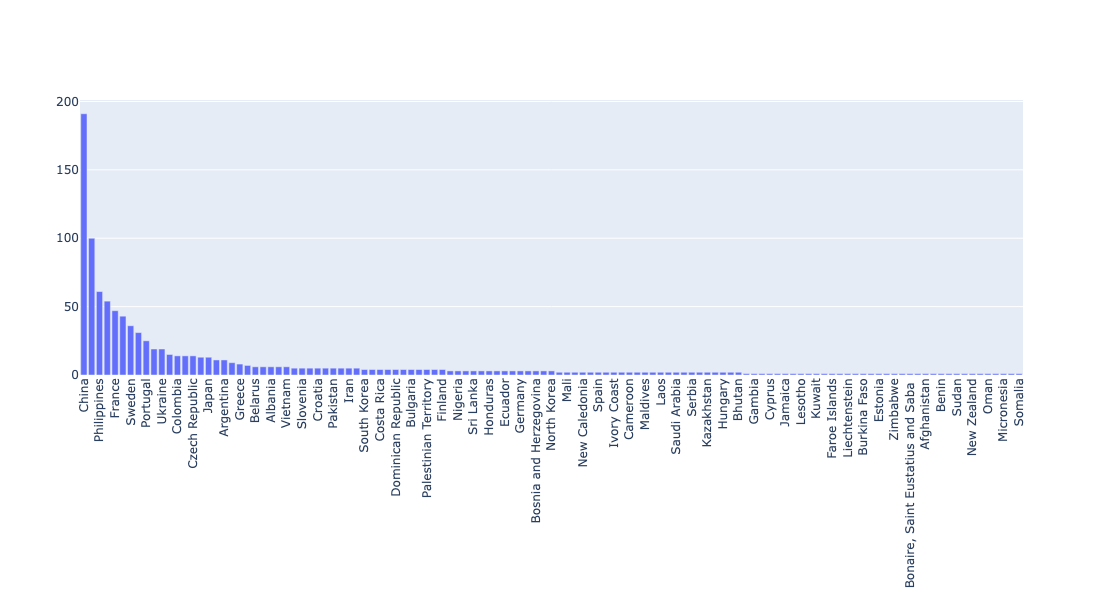

In [44]:
fig = go.Figure(data=[go.Bar(x=country_counts.index, y=country_counts.values)])
fig.update_layout(width=1100, height=600, xaxis_tickangle=-90)
fig.show()

In [49]:
paystore_counts = df['pay_store'].value_counts()
pd.DataFrame(paystore_counts)

,pay_store
Other,699
AOS,151
IOS,150


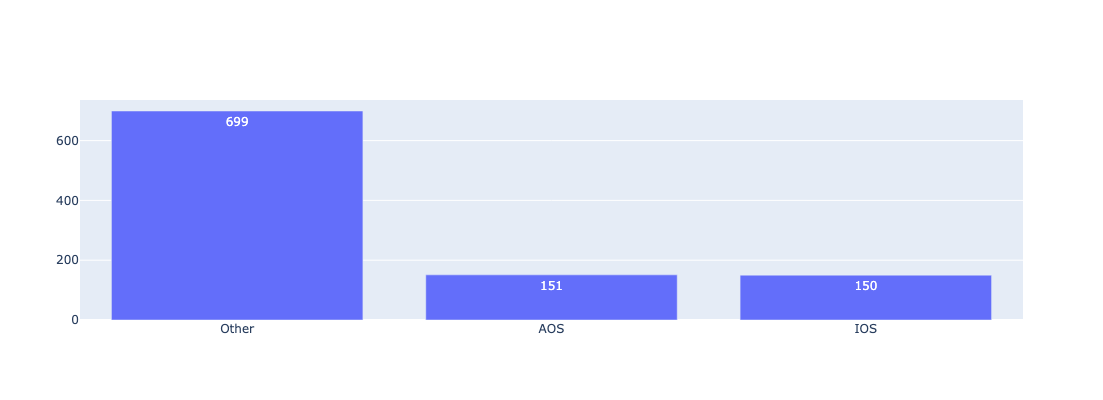

In [51]:
fig = go.Figure(data=[go.Bar(x=paystore_counts.index, y=paystore_counts.values, text=paystore_counts.values, textposition='auto')])
fig.update_layout(width=500, height=400)
fig.show()

- AOS와 IOS를 합한 것보다 다른 플랫폼에서 결제한 건이 많다.
- 각 플랫폼의 유저들을 다 잘 관리해야 할 듯, 플랫폼 별로 차이가 없도록 운영

In [54]:
# 3. information_agree 수 확인

agree_counts = df['information_agree'].value_counts()
pd.DataFrame(agree_counts)

,information_agree
False,510
True,490


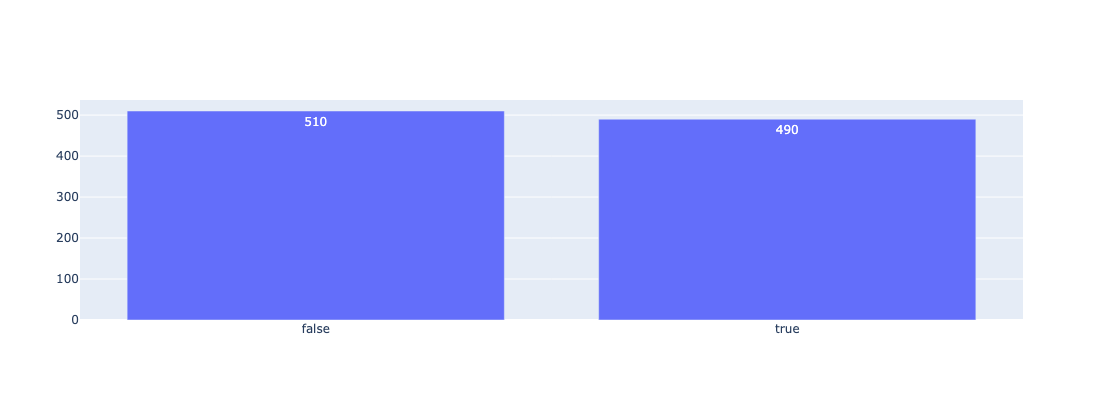

In [55]:
fig = go.Figure(data=[go.Bar(x=agree_counts.index, y=agree_counts.values, text=agree_counts.values, textposition='auto')])
fig.update_layout(width=500, height=400)
fig.show()

- 정보동의를 하지 않은 유저가 더 많다.
- 비율이 비슷하기는 한데 이 부분이 중요한 부분이 될지는 모르겠다. 

In [82]:
df['first_login_date'].unique()

array(['20-Mar', '21-Dec', '20-Nov', '21-Jan', '22-Jan', '21-Jul',
       '23-Oct', '22-Dec', '22-Sep', '22-Nov', '21-Mar', '20-Dec',
       '21-Feb', '23-Sep', '20-Sep', '22-May', '20-Jan', '22-Mar',
       '23-Apr', '22-Jun', '23-Feb', '23-Jan', '21-Jun', '20-Jul',
       '23-Mar', '21-Nov', '22-Apr', '23-Jul', '20-May', '20-Aug',
       '22-Feb', '20-Apr', '20-Oct', '21-Oct', '23-Dec', '20-Feb',
       '21-Aug', '20-Jun', '22-Oct', '24-Feb', '21-Sep', '23-May',
       '21-May', '24-Jan', '21-Apr', '22-Aug', '22-Jul', '23-Aug',
       '23-Nov', '23-Jun'], dtype=object)

In [83]:
# 4. 신규 유저 수 확인

desired_order = ['20-Jan', '20-Feb', '20-Mar', '20-Apr', '20-May', '20-Jun', '20-Jul', '20-Aug', '20-Sep', '20-Oct', '20-Nov', '20-Dec',
                 '21-Jan', '21-Feb', '21-Mar', '21-Apr', '21-May', '21-Jun', '21-Jul', '21-Aug', '21-Sep', '21-Oct', '21-Nov', '21-Dec',   
                 '22-Jan', '22-Feb', '22-Mar', '22-Apr', '22-May', '22-Jun', '22-Jul', '22-Aug', '22-Sep', '22-Oct', '22-Nov', '22-Dec', 
                 '23-Jan', '23-Feb', '23-Mar', '23-Apr', '23-May', '23-Jun', '23-Jul', '23-Aug', '23-Sep', '23-Oct', '23-Nov', '23-Dec', 
                 '24-Jan', '24-Feb']

first_date_counts = df['first_login_date'].value_counts().reindex(desired_order)
pd.DataFrame(first_date_counts)

,first_login_date
20-Jan,24
20-Feb,16
20-Mar,22
20-Apr,20
20-May,26
20-Jun,15
20-Jul,30
20-Aug,29
20-Sep,18
20-Oct,25


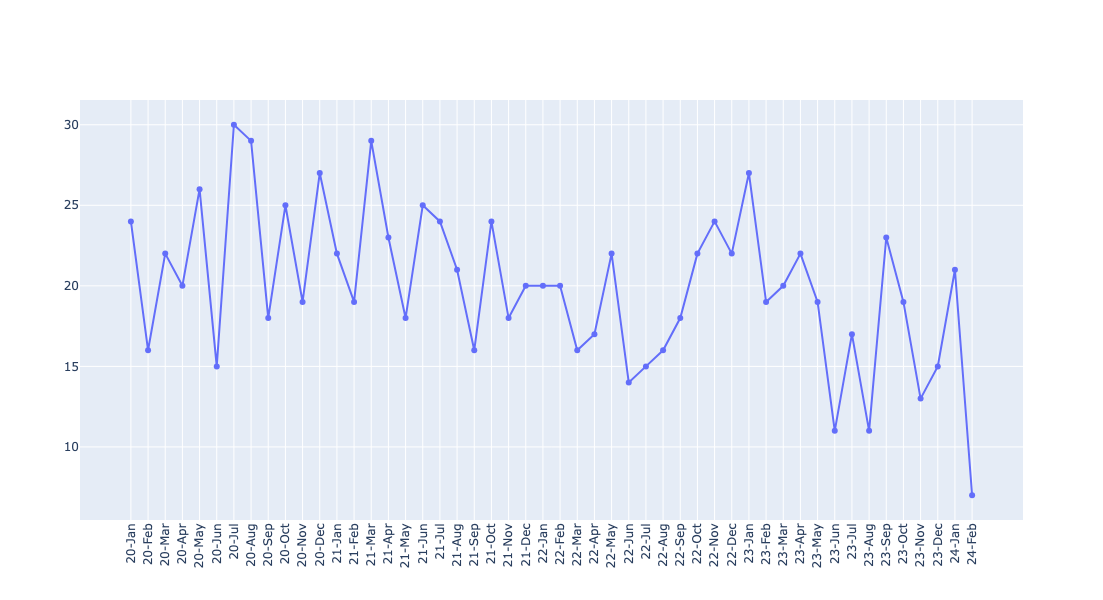

In [87]:
fig = go.Figure(data=[go.Scatter(x=first_date_counts.index, y=first_date_counts.values, mode='lines+markers', text=first_date_counts.values, textposition='top center')])
fig.update_layout(width=1100, height=600, xaxis_tickangle=-90)
fig.show()

- 전체적인 기조로 보았을 때 신규 유저가 줄은 것으로 보인다.
- 신규 유입을 위한 프로모션이 무엇이 있을지 생각해보면 좋을 것 같다.

In [89]:
# pay_user_type 

user_type_counts = df['pay_user_type'].value_counts()
user_type_counts

heavy user     722
light user     144
medium user    134
Name: pay_user_type, dtype: int64

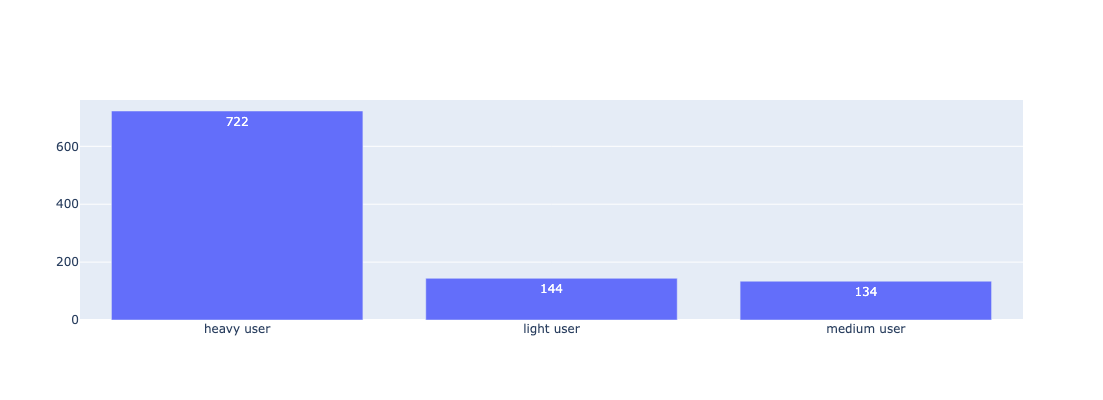

In [90]:
fig = go.Figure(data=[go.Bar(x=user_type_counts.index, y=user_type_counts.values, text=user_type_counts.values, textposition='auto')])
fig.update_layout(width=500, height=400)
fig.show()

- 이 데이터에서 heavy user의 기준을 정확하게 모르겠지만 배틀패스나 다른 유료템을 많이 구매하는 유저들이 많은 것으로 보임
- heavy user와 배틀패스와의 관계를 알아보는 것이 중요해 보임

- pay_user_type 별로 playtime, battle_pass_level, level를 알아보기

In [98]:
df.groupby('pay_user_type').agg('mean')[['pay_amount', 'level', 'playtime', 'battle_pass_level']]

,pay_amount,level,playtime,battle_pass_level
pay_user_type,,,,
heavy user,501941.173130,49.494460,5321.316620,10.508972
light user,514842.986111,53.215278,5331.033750,11.232759
medium user,525298.694030,49.768657,5132.408731,10.291667


- 지금 위의 자료로 보면 유저를 어떤 기준으로 나누는지 잘 모르겠다.
- battle_pass_level의 null값과 0을 좀 더 분석해 보아야 할 것 같다.

In [104]:
heavy_user_df = df[df['pay_user_type'] == 'heavy user']
heavy_user_df.head()

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
0,bb0aa56d-fd4e-461a-871f-6f4fd9c4d1b9,Conny,Jerzykiewicz,cjerzykiewicz0@sourceforge.net,F,178.160.146.88,Mongolia,Other,816452,False,20-Mar,heavy user,48,pve,8297.29,7.0
1,59740d2b-5fca-4107-a4a8-c77c2aaa7b7e,Engracia,Radbourn,eradbourn1@weather.com,F,105.205.185.220,Indonesia,AOS,384905,True,21-Dec,heavy user,87,pvp,3492.51,2.0
2,0e07978a-443f-418a-88a8-08d111d2b8b9,Cassie,Jockle,cjockle2@mediafire.com,M,107.44.140.249,Ireland,Other,12513,False,20-Nov,heavy user,78,fishing,2902.57,7.0
3,57a9003b-f041-4643-80e6-bafcc2ad35dc,Papagena,Oles,poles3@guardian.co.uk,F,14.75.218.226,China,AOS,678059,False,21-Jan,heavy user,46,pvp,9616.49,18.0
4,806ecf02-f399-41ac-ba5d-f97c6caefc07,Boyce,Fleischmann,bfleischmann4@joomla.org,F,14.182.239.98,Indonesia,Other,98767,True,22-Jan,heavy user,5,fishing,3656.33,18.0


In [105]:
heavy_user_df['battle_pass_level'].value_counts()

15.0    37
13.0    37
12.0    35
7.0     34
4.0     34
14.0    34
19.0    34
9.0     32
20.0    32
1.0     32
6.0     31
11.0    30
10.0    28
18.0    28
17.0    27
5.0     27
3.0     26
8.0     24
2.0     23
16.0    20
0.0      8
Name: battle_pass_level, dtype: int64

In [106]:
medi_user_df = df[df['pay_user_type'] == 'medium user']

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level
10,4849d595-70d0-4cb5-a8ad-4f4933c050d7,Stefa,Burt,sburta@unc.edu,M,1.197.81.20,China,Other,128868,True,22-Nov,medium user,1,pve,7149.13,0.0
12,2131ab2d-85cd-4713-9c66-5031e1644574,Patton,Matthias,pmatthiasc@spiegel.de,M,76.23.156.16,Poland,Other,650894,True,21-Mar,medium user,23,pvp,6034.46,0.0
21,b9a206ef-053d-46ee-afdd-e664166c7f7d,Ryley,Willoughby,rwilloughbyl@spiegel.de,M,173.103.73.97,Peru,AOS,8994,True,23-Apr,medium user,27,pvp,2036.05,20.0
29,16cdc2b1-deda-4da1-a2d4-fba3a5fa5662,Baudoin,Lille,blillet@i2i.jp,F,130.64.177.208,Canada,IOS,722198,True,20-Jul,medium user,22,pve,6633.27,15.0
36,50dd1ea6-562e-41bc-a881-8a29532b7788,Fidelio,Warland,fwarland10@trellian.com,F,18.88.43.170,Palestinian Territory,Other,977131,False,23-Apr,medium user,29,fishing,3231.23,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,c78a88c2-0bb7-480a-b6a6-03306c4366e5,Elmore,Drinan,edrinanqu@thetimes.co.uk,M,210.189.143.113,Philippines,Other,330495,True,22-Nov,medium user,99,pve,8653.18,7.0
970,18acb693-1b84-40e6-94dd-c3da83796f48,Star,Bilney,sbilneyqy@smugmug.com,F,237.11.125.192,Costa Rica,IOS,263016,True,20-Aug,medium user,37,pve,2370.61,17.0
973,0328726a-a08e-4f46-b4ba-ccf06ffc8bd8,Felike,McVitie,fmcvitier1@narod.ru,M,184.178.22.103,Argentina,AOS,329285,False,21-Jun,medium user,25,pve,4172.36,14.0
987,6490da4d-eff2-46d3-b638-3dfa116a142d,Jolene,Marven,jmarvenrf@woothemes.com,M,121.238.162.150,Luxembourg,Other,307288,False,24-Feb,medium user,51,pvp,9007.96,15.0
